# Capstone Project - The Battle of Neighborhoods (Week 2)

Let's Start

# Problem Statement

A prospective business owner wants to start his new business by developing both online and physical distribution for high-end products. The owner desires to know where he should starts his business in a city that has been not been fully developed or ignored. Through this approach, he hope to minimise the risk, generate revenu rapidely and develop faster. He also wants to know where he should look within a city to install his shop based on previous data and evaluate, if possible, trends.

Here we will take Herbs and Spices as an example - because it is expected to only have few per cities - so that we can pull more data across Europe using FourSquare.

# Data Gathering


1. Need to collect cities across Europe with a large population
2. For all of the cities; get all possible information, inhabitant, median income, density the population in the city, etc.
3. Find the locations for the shop in the category for the list of city.
4. Evaluate the data retrieve from FourSquare and respond to the question by establishing a country/city where it would make most sense. Or propose few cities that seemed appropriate.

We are making the assumptions (which will need to be tested)
0. We are making the assumptions that the data available mark 'successful' businesses.
1. That the larger cities are already saturated and will be used as a basis to evaluate the target values.
2. That for that specific product/category there is no variations across countries (no regionality).
3. That large cities present similar densities has smaller cities -> mostly linked to the number of inhabitants, although other factors would need to be established (as required, such as income or else).

Unknown:
1. Is the clientele for such products only local (and what is local)? -> (need to establish buying power around the location - if we see something odd in the distribution)
2. Are those independant shops or part of larger groups - this may influence startegy?
3. Are these category of shops established within a larger network (for example a place for coworking as few coffees shop around) that attract most of the clientele ?
3. How much of an online presence do they have? 
4. How specialised are those companies -> only selling one category or multiple category (backery with tee salon) ?

Where should it look for a shop?
1. Look at similar shops (categories) in few cities across Europe to establish link and establish density of such shop in a city.
2. Establish trends/pattern based on the data gathered.
3. Evaluate where it would make more sense to implant a new shop

# Methodology

Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.

In [38]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import os
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

#!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


#! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


##### Details for access FourSquare

In [26]:
CLIENT_ID = 'LDMXHLEAMUV0HB4KEAS340DNOCMSWQWLDUKIH1ZBY2D02BQE' # your Foursquare ID
CLIENT_SECRET = 'P30VXFEV2WCRPSJ3Z2IMCRASV5ENJYXQJ5R2VRYZO1FHREGH' # your Foursquare Secret
ACCESS_TOKEN = 'B2FB5IFDLCR5AZIVGENDCJZL0BT2OP1PGFZZLB22QKVAP5RZ' # your FourSquare Access Token
VERSION = '2021042901'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LDMXHLEAMUV0HB4KEAS340DNOCMSWQWLDUKIH1ZBY2D02BQE
CLIENT_SECRET:P30VXFEV2WCRPSJ3Z2IMCRASV5ENJYXQJ5R2VRYZO1FHREGH


## Get European Statistic from various sources

#### Get Cities in Europe above 300,000 inhabitants

In [7]:
url = 'https://en.wikipedia.org/wiki/List_of_cities_in_the_European_Union_by_population_within_city_limits'

In [8]:
data  = requests.get(url).text
soup = BeautifulSoup(data,'html5lib')
table = soup.find('table')

In [9]:
rng = np.arange(start=0, stop=len(table.findAll('td')), step=7)
tds = table.findAll('td')
city = []
country = []
pop = []

for r in rng: 
    if tds[r+1].text.strip()!='':
        a = tds[r+1].text.strip()
        city.append(tds[r+1].text.strip())
        country.append(tds[r+2].text.strip())
        pop.append(tds[r+3].text.strip())

In [10]:
d = {'City': city, 'Country': country, 'Population': pop}
europe = pd.DataFrame(data = d, index=None, columns=['City','Country','Population'])
print(europe.shape)
europe.head()

(93, 3)


,City,Country,Population
0,Berlin,Germany,"3,669,495"
1,Madrid,Spain,"3,348,536"
2,Rome,Italy,"2,856,133"
3,Bucharest,Romania,"2,155,240"
4,Paris,France,"2,140,526"


#### Get the Latitude and Longitude for the cities - and add to dataframe

In [11]:
lat = []
lng = []

for ci,co in zip(europe.City, europe.Country):
    address = ci, co
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    lat.append(latitude)
    lng.append(longitude)
    
europe['Latitude'] = lat
europe['Longitude'] = lng

## Add the Average Monthly Net Salary (After Tax) by City In Europe

In [12]:
url = 'https://www.numbeo.com/cost-of-living/region_prices_by_city?itemId=105&region=150'

In [13]:
data  = requests.get(url).text
soup = BeautifulSoup(data,'html5lib')
table = soup.findAll('table')

In [14]:
# the data is at the bottom in the 2nd table
rng = np.arange(start=0, stop=len(table[1].findAll('td')), step=3)
tds = table[1].findAll('td')
city = []
country = []
sal = []

for r in rng:
    city.append(tds[r+1].text.strip().split(',')[0])
    country.append(tds[r+1].text.strip().split(',')[1])
    sal.append(tds[r+2].text.strip())

In [15]:
d = {'City': city, 'Country': country, 'Salary (USD)': sal}
europe2 = pd.DataFrame(data = d, index=None, columns=['City','Country','Salary (USD)'])
# remove the Country to facilitate merging both dataset
europe2 = europe2.drop('Country', 1)
europe = europe.join(europe2.set_index('City'), on='City')
print(europe.shape)
europe.head()

(93, 6)


,City,Country,Population,Latitude,Longitude,Salary (USD)
0,Berlin,Germany,"3,669,495",52.517037,13.388860,2968.07
1,Madrid,Spain,"3,348,536",40.416705,-3.703582,1931.45
2,Rome,Italy,"2,856,133",41.893320,12.482932,1763.19
3,Bucharest,Romania,"2,155,240",44.436141,26.102720,866.85
4,Paris,France,"2,140,526",48.856697,2.351462,3279.19


In [16]:
#save the dataframe (here we did not loose city by joining data)
europe_ori = europe

### Add  Population density in metropolitan regions 

Got the data from Europe Statistic Database - which can be downloaded.

In [17]:
europe2 = pd.read_csv('/Users/oliviermesse/Downloads/met_d3dens/met_d3dens_1_Data.csv', encoding='cp1252')

europe2 = europe2[europe2['TIME']==2016]
europe2 = europe2.drop('TIME',1)
europe2 = europe2.drop('Flag and Footnotes',1)
europe2.head()

,METROREG,Value
3213,Belgium,371
3214,Bruxelles / Brussel,933
3215,Antwerpen,1 080
3216,Gent,499
3217,Charleroi,770


In [18]:
europe = europe.join(europe2.set_index('METROREG'), on='City')
col = europe.columns.values
col[-1] = 'Density'
europe.columns = col
europe = europe.dropna()
europe.head()

,City,Country,Population,Latitude,Longitude,Salary (USD),Density
0,Berlin,Germany,"3,669,495",52.517037,13.388860,2968.07,303
1,Madrid,Spain,"3,348,536",40.416705,-3.703582,1931.45,809
4,Paris,France,"2,140,526",48.856697,2.351462,3279.19,1 015
6,Hamburg,Germany,"1,899,160",53.550341,10.000654,3090.51,460
8,Budapest,Hungary,"1,752,286",47.498382,19.040471,1022.48,441


In [19]:
print(europe.shape)

(44, 7)


### add the cities that were removed - because lack of density data.
the cities are more important has they would allow use to get more shops across europe.

In [20]:
idx = []
for c,e in enumerate(europe_ori['City']):
    try:
        europe[europe['City']==e].index.values[0]>=0
    except(IndexError):
        idx.append(c)
        
eur_rem = europe_ori.iloc[idx,:]
eur_rem = eur_rem.reset_index()
eur_rem= eur_rem.drop('index',1)
eur_rem['Density'] = 0*eur_rem['Salary (USD)']
eur_rem.tail()


,City,Country,Population,Latitude,Longitude,Salary (USD),Density
44,Córdoba,Spain,"325,708",37.884581,-4.776014,NaN,NaN
45,Constanța,Romania,"317,832",44.176716,28.650760,NaN,NaN
46,Münster,Germany,"314,319",51.962510,7.625188,NaN,NaN
47,Mannheim,Germany,"309,370",49.489291,8.467310,2815.87,
48,Galați,Romania,"304,050",45.433822,28.054939,NaN,NaN


In [21]:
#a = europe[europe['City']==europe_ori['City'][0]].index
#europe[europe['City']==e].index
europe = europe.append(eur_rem)
print(europe.shape)
europe.tail()

(93, 7)


,City,Country,Population,Latitude,Longitude,Salary (USD),Density
44,Córdoba,Spain,"325,708",37.884581,-4.776014,NaN,NaN
45,Constanța,Romania,"317,832",44.176716,28.650760,NaN,NaN
46,Münster,Germany,"314,319",51.962510,7.625188,NaN,NaN
47,Mannheim,Germany,"309,370",49.489291,8.467310,2815.87,
48,Galați,Romania,"304,050",45.433822,28.054939,NaN,NaN


### Add  Age Distribtion (%)  in the cities 

Got the data from Europe Statistic Database - which can be downloaded/.

In [22]:
europe2 = pd.read_csv('/Users/oliviermesse/Downloads/met_pjanaggr3/met_pjanaggr3_1_Data.csv', encoding='cp1252')
europe2 = europe2[europe2['TIME']==2016]
#np.unique(europe2.METROREG.values)
europe2 = europe2 = europe2.drop('TIME',1)
europe2 = europe2.drop('Flag and Footnotes',1)
col = europe2.columns.values
col[-1] = 'Population'
europe2.columns = col

europe2 = europe2.reset_index()
europe2 = europe2.drop('index',1)
europe2['Population'] = [val.replace(':','NaN') for val in europe2['Population'].values]
europe2['Population'] = [float(val.replace(' ','')) for val in europe2['Population'].values]
europe2.head(10)

,METROREG,AGE,SEX,Population
0,Belgium,Total,Total,11311117.0
1,Belgium,Total,Males,5569264.0
2,Belgium,Total,Females,5741853.0
3,Belgium,Less than 15 years,Total,1921342.0
4,Belgium,Less than 15 years,Males,982958.0
5,Belgium,Less than 15 years,Females,938384.0
6,Belgium,From 15 to 64 years,Total,7326873.0
7,Belgium,From 15 to 64 years,Males,3690158.0
8,Belgium,From 15 to 64 years,Females,3636715.0
9,Belgium,65 years or over,Total,2062902.0


In [23]:
europe['Population < 15 (%)'] = 0*europe['Salary (USD)']
europe['Population > 15 < 65 (%)'] = 0*europe['Salary (USD)']
europe['Population > 65 (%)'] = 0*europe['Salary (USD)']

for c in np.unique(europe2['METROREG']):
    if europe[europe['City']==c].shape[0]!=0:
        tmp = europe2[europe2['METROREG']==c]
        m0 = tmp['AGE']=='Total'
        m1 = tmp['SEX']=='Total'
        m2 = tmp['AGE']=='Less than 15 years'
        m3 = tmp['SEX']=='Total'
        m4 = tmp['AGE']=='From 15 to 64 years'
        m5 = tmp['SEX']=='Total'
        m6 = tmp['AGE']=='65 years or over'
        m7 = tmp['SEX']=='Total'

        b = europe[europe['City']==c].index
        europe.loc[b,'Population < 15 (%)'] = tmp[m2 & m3]['Population'].values/tmp[m0 & m1]['Population'].values*100
        europe.loc[b,'Population > 15 < 65 (%)'] = tmp[m4 & m5]['Population'].values/tmp[m0 & m1]['Population'].values*100
        europe.loc[b,'Population > 65 (%)'] = tmp[m6 & m7]['Population'].values/tmp[m0 & m1]['Population'].values*100

    

In [24]:
europe.head()

,City,Country,Population,Latitude,Longitude,Salary (USD),Density,Population < 15 (%),Population > 15 < 65 (%),Population > 65 (%)
0,Berlin,Germany,"3,669,495",52.517037,13.388860,2968.07,303,13.3817,66.4908,20.1275
1,Madrid,Spain,"3,348,536",40.416705,-3.703582,1931.45,809,15.9028,66.8846,17.2126
4,Paris,France,"2,140,526",48.856697,2.351462,3279.19,1 015,19.7351,65.919,14.346
6,Hamburg,Germany,"1,899,160",53.550341,10.000654,3090.51,460,13.6743,66.1848,20.1409
8,Budapest,Hungary,"1,752,286",47.498382,19.040471,1022.48,441,14.7666,66.9898,18.2436


## Get the Herbs and Spice Shop in the various cities. 

Note:  Only expect few shops per cities.

In [27]:
VERSION

'2021042901'

In [28]:
# define the search query --> this got me all of the stuff with Herbs in the map
# search_query = 'Herbs & Spices Store'
# define the category ID
cat_id = '52f2ab2ebcbc57f1066b8b2c'
# define a radius of 10000m
radius = 10000
# only ask for a 50 requests - so I don't expect so many
LIMIT = 50
# declare an empty dataframe to append the data in the for loop
d = pd.DataFrame()

for latitude, longitude in zip(europe.Latitude, europe.Longitude):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&categoryId={}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        latitude, 
        longitude,
        ACCESS_TOKEN, 
        VERSION,
        cat_id,
        radius,
        LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    dataframe = pd.json_normalize(venues)
    d = d.append(dataframe)
d.shape

(504, 19)

In [29]:
d.head()
d_filtered = d.drop(columns = ['location.postalCode',
                               'location.crossStreet',
                               'venuePage.id',
                               'location.cc',
                               'location.state',
                               'location.labeledLatLngs',
                               'location.neighborhood',
                               'hasPerk'],
                    axis = 1)
d_filtered.head()

,id,name,categories,referralId,location.address,location.lat,location.lng,location.distance,location.city,location.country,location.formattedAddress
0,5444db9b498e6255f16c1741,Vitalia GmbH,"[{'id': '52f2ab2ebcbc57f1066b8b2c', 'name': 'H...",v-1619878798,Friedrichatrasse 141,52.519804,13.388168,311,Berlin,Deutschland,"[Friedrichatrasse 141, 10117 Berlin]"
1,562b845a498e54d255e88bb8,Ölmühle an der Havel,"[{'id': '52f2ab2ebcbc57f1066b8b2c', 'name': 'H...",v-1619878798,NaN,52.489915,13.388961,3019,Berlin,Deutschland,[Berlin]
2,5f2e9cbeffd5a510076bd8d1,Ankerkraut Store Berlin,"[{'id': '52f2ab2ebcbc57f1066b8b2c', 'name': 'H...",v-1619878798,Oranienburger Straße 1-3,52.523705,13.401353,1125,NaN,Deutschland,[Oranienburger Straße 1-3]
3,53974882498edbdef8858bb7,Babu Bazar,"[{'id': '52f2ab2ebcbc57f1066b8b2c', 'name': 'H...",v-1619878798,NaN,52.552687,13.379604,4017,Berlin,Deutschland,[Berlin]
4,4adcda8ef964a520a54a21e3,Harb,"[{'id': '52f2ab2ebcbc57f1066b8b2c', 'name': 'H...",v-1619878798,Potsdamer Straße 93,52.501590,13.364067,2403,Berlin,Deutschland,"[Potsdamer Straße 93, 10785 Berlin]"


### Define a Function to clean the data 

In [30]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [31]:
d_filtered['categories'] = d_filtered.apply(get_category_type, axis=1)
d_filtered.head()

,id,name,categories,referralId,location.address,location.lat,location.lng,location.distance,location.city,location.country,location.formattedAddress
0,5444db9b498e6255f16c1741,Vitalia GmbH,Herbs & Spices Store,v-1619878798,Friedrichatrasse 141,52.519804,13.388168,311,Berlin,Deutschland,"[Friedrichatrasse 141, 10117 Berlin]"
1,562b845a498e54d255e88bb8,Ölmühle an der Havel,Herbs & Spices Store,v-1619878798,NaN,52.489915,13.388961,3019,Berlin,Deutschland,[Berlin]
2,5f2e9cbeffd5a510076bd8d1,Ankerkraut Store Berlin,Herbs & Spices Store,v-1619878798,Oranienburger Straße 1-3,52.523705,13.401353,1125,NaN,Deutschland,[Oranienburger Straße 1-3]
3,53974882498edbdef8858bb7,Babu Bazar,Herbs & Spices Store,v-1619878798,NaN,52.552687,13.379604,4017,Berlin,Deutschland,[Berlin]
4,4adcda8ef964a520a54a21e3,Harb,Herbs & Spices Store,v-1619878798,Potsdamer Straße 93,52.501590,13.364067,2403,Berlin,Deutschland,"[Potsdamer Straße 93, 10785 Berlin]"


In [32]:
cat = set(d_filtered.categories)
cat 

{'Alternative Healer',
 'Building',
 'Butcher',
 'Café',
 'Candy Store',
 'Cocktail Bar',
 'Coffee Shop',
 'Convenience Store',
 'Cosmetics Shop',
 'Distribution Center',
 "Doctor's Office",
 'Flower Shop',
 'Food & Drink Shop',
 'Fruit & Vegetable Store',
 'Furniture / Home Store',
 'Garden Center',
 'Gourmet Shop',
 'Grocery Store',
 'Health Food Store',
 'Herbs & Spices Store',
 'Indian Restaurant',
 'Kitchen Supply Store',
 'Monument / Landmark',
 'Organic Grocery',
 'Perfume Shop',
 'Pharmacy',
 'Pop-Up Shop',
 'Sporting Goods Shop',
 'Tea Room',
 'Wine Shop',
 'Yoga Studio'}

### Downselect to only few that make sense - or which primary business is to sell spices as a specificality product

In [33]:
cat_tokeep = ['Organic Grocery',
              'Health Food Store',
              'Food & Drink Shop',
              'Herbs & Spices Store',
              'Miscellaneous Shop',
              'Market',
              'Flea Market',
              'Gourmet Shop',
              'Kitchen Supply Store']

d_fil = pd.DataFrame() 

for c in cat_tokeep:
    d_fil = d_fil.append(d_filtered[d_filtered.categories == c])
    
d_fil.head()

,id,name,categories,referralId,location.address,location.lat,location.lng,location.distance,location.city,location.country,location.formattedAddress
3,5c378de0d48ec1002cc392de,Maria Granel,Organic Grocery,v-1619878823,NaN,38.716377,-9.163293,2510,Lisboa,Portugal,"[1250 Lisboa, Portugal]"
4,566d672b498ed1938c9a1afe,Maria Granel,Organic Grocery,v-1619878823,"Rua José Duro, 22C",38.754389,-9.141018,5205,Lisboa,Portugal,"[Rua José Duro, 22C, 1700-061 Lisboa, Portugal]"
0,59e9e168f79faa25d766a288,ekoAleja,Organic Grocery,v-1619878824,5 Aleja Jana Pawła II,54.400380,18.607287,4542,Zaspa,Polska,"[5 Aleja Jana Pawła II, 80-462 Gdańsk Zaspa, P..."
5,5fa93c108567ce5f92de5941,Herbaház,Health Food Store,v-1619878800,NaN,47.555532,19.079511,7006,Budapest XIII. kerület,Magyarország,"[Budapest XIII. kerület, 1138, Magyarország]"
9,4cceb8c22dc43704f533d608,Örtagubben,Health Food Store,v-1619878801,Odengatan 37,59.344796,18.058739,2300,Stockholm,Sverige,"[Odengatan 37, Stockholm, Sverige]"


## Map of the Herbs and Spice Shops

In [34]:
#Middle of Europe
latitude = 53
longitude = 10

venues_map = folium.Map(location=[latitude, longitude], zoom_start=5) # generate map centred on Europe

#for lat, lng, label in zip(europe.iloc[:,3], europe.iloc[:,4], europe.City):
#    folium.CircleMarker(
#        [lat, lng],
#        radius=1,
#        color='red',
#        popup=label,
#        fill = True,
#        fill_color='red',
#        fill_opacity=0.6
#    ).add_to(venues_map)

# add the interesting area as blue circle markers
for lat, lng, label in zip(d_fil['location.lat'], d_fil['location.lng'], d_fil.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [36]:
n, bins, patches = plt.hist(x=d_fil['location.distance'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Distance to the city centre (meters)')
plt.ylabel('Frequency')
plt.title('Distance of the shops to the city centre')
maxfreq = n.max()

NameError: name 'plt' is not defined

Conclusions: Most of the "Herbs and Spice" shops are located close to the city center of the cities. Although some are further away from the city centre. 

In [40]:
try:
    d_fil = d_fil.drop('level_0', 1)
except: 
    print('level_0 no present')
d_fil.reset_index(inplace = True)
try:
    d_fil = d_fil.drop('index', 1)
except: 
    print('index no present')
d_fil.head()

level_0 no present


,id,name,categories,referralId,location.address,location.lat,location.lng,location.distance,location.city,location.country,location.formattedAddress
0,5c378de0d48ec1002cc392de,Maria Granel,Organic Grocery,v-1619878823,NaN,38.716377,-9.163293,2510,Lisboa,Portugal,"[1250 Lisboa, Portugal]"
1,566d672b498ed1938c9a1afe,Maria Granel,Organic Grocery,v-1619878823,"Rua José Duro, 22C",38.754389,-9.141018,5205,Lisboa,Portugal,"[Rua José Duro, 22C, 1700-061 Lisboa, Portugal]"
2,59e9e168f79faa25d766a288,ekoAleja,Organic Grocery,v-1619878824,5 Aleja Jana Pawła II,54.400380,18.607287,4542,Zaspa,Polska,"[5 Aleja Jana Pawła II, 80-462 Gdańsk Zaspa, P..."
3,5fa93c108567ce5f92de5941,Herbaház,Health Food Store,v-1619878800,NaN,47.555532,19.079511,7006,Budapest XIII. kerület,Magyarország,"[Budapest XIII. kerület, 1138, Magyarország]"
4,4cceb8c22dc43704f533d608,Örtagubben,Health Food Store,v-1619878801,Odengatan 37,59.344796,18.058739,2300,Stockholm,Sverige,"[Odengatan 37, Stockholm, Sverige]"


In [41]:
for i in d_fil.index:
    a = d_fil.loc[i,'location.lat']-europe.Latitude
    b = d_fil.loc[i,'location.lng']-europe.Longitude
    idx = np.argmin((np.abs(a))*(np.abs(b)))
    d_fil.loc[i,'location.city'] = europe.iloc[idx,0] # 'City'
    #d_fil.loc[i,'location.country'] = europe.loc[idx,'Country']
    #print(i,' the city is ', d_fil.loc[i,'location.city'], 'and was found to be ', europe.iloc[idx,0],)  
#d_fil

In [42]:
#print(dataframe_filtered.shape)
d_group = d_fil.groupby('location.city').count()
d_group = d_group.reset_index()
d_group.head()

,location.city,id,name,categories,referralId,location.address,location.lat,location.lng,location.distance,location.country,location.formattedAddress
0,Alicante,1,1,1,1,1,1,1,1,1,1
1,Amsterdam,18,18,18,18,13,18,18,18,18,18
2,Antwerp,7,7,7,7,4,7,7,7,7,7
3,Athens,44,44,44,44,38,44,44,44,44,44
4,Barcelona,20,20,20,20,17,20,20,20,20,20


In [43]:
d_group = d_group[['location.city','id']]
d_group.columns = ['location.city','Count']
#d_group.head()

europe = europe.join(d_group.set_index('location.city'), on='City')
europe.head()

,City,Country,Population,Latitude,Longitude,Salary (USD),Density,Population < 15 (%),Population > 15 < 65 (%),Population > 65 (%),Count
0,Berlin,Germany,"3,669,495",52.517037,13.388860,2968.07,303,13.3817,66.4908,20.1275,16.0
1,Madrid,Spain,"3,348,536",40.416705,-3.703582,1931.45,809,15.9028,66.8846,17.2126,12.0
4,Paris,France,"2,140,526",48.856697,2.351462,3279.19,1 015,19.7351,65.919,14.346,21.0
6,Hamburg,Germany,"1,899,160",53.550341,10.000654,3090.51,460,13.6743,66.1848,20.1409,9.0
8,Budapest,Hungary,"1,752,286",47.498382,19.040471,1022.48,441,14.7666,66.9898,18.2436,28.0


In [44]:
europe["Count"] = europe["Count"].fillna(0)
europe["Population"]= europe["Population"].apply(lambda x: float(x.replace(',', '')))

In [45]:
europe['Density Shop/Pop'] = europe["Count"]/europe["Population"]
europe["Density Shop/Pop"] = europe["Density Shop/Pop"].fillna(0)

print('the average density of shop per 10000 habitants is:', europe['Density Shop/Pop'].mean()*10000)
print('the maximum density of shop per 10000 habitants is:', europe['Density Shop/Pop'].max()*10000, 'in', europe['City'][europe['Density Shop/Pop'].argmax()])
print('the mininmum density of shops per 10000 habitants is:', europe['Density Shop/Pop'].min()*10000, 'in',europe['City'][europe['Density Shop/Pop'].argmin()])

europe["Count"] = europe["Count"].fillna(0)
print('the following cities have no shop for spices:\n', europe["City"][europe["Count"] == 0])

the average density of shop per 10000 habitants is: 0.06485258242254893
the maximum density of shop per 10000 habitants is: 0.6626046990720522 in Szczecin
the mininmum density of shops per 10000 habitants is: 0.0 in 15    Stockholm
15     Zaragoza
Name: City, dtype: object
the following cities have no shop for spices:
 33     Stuttgart
45        Dublin
51          Lyon
75        Lublin
76         Varna
88       Catania
90        Nantes
15      Zaragoza
19      Dortmund
20         Essen
21    Gothenburg
30      Duisburg
33          Iași
35    Las Palmas
37     Wuppertal
38        Aarhus
40         Malmö
45     Constanța
46       Münster
47      Mannheim
48        Galați
Name: City, dtype: object


In [46]:
europe["Salary (USD)"]= europe["Salary (USD)"].apply(lambda x: float(x))
europe["Density Shop/MedianIcome"] = europe["Count"]/europe["Salary (USD)"]

print('the average density of shop per MedianIncome is:', europe["Density Shop/MedianIcome"].mean())
print('the maximum density of shop per MedianIncome is:', europe["Density Shop/MedianIcome"].max(), 'in', europe['City'][europe['Density Shop/MedianIcome'].argmax()])
print('the mininmum density of shops per MedianIncome is:', europe["Density Shop/MedianIcome"].min(), 'in',europe['City'][europe['Density Shop/MedianIcome'].argmin()])

the average density of shop per MedianIncome is: 0.004086887639851002
the maximum density of shop per MedianIncome is: 0.04422955137161871 in Szczecin
the mininmum density of shops per MedianIncome is: 0.0 in 15    Stockholm
15     Zaragoza
Name: City, dtype: object


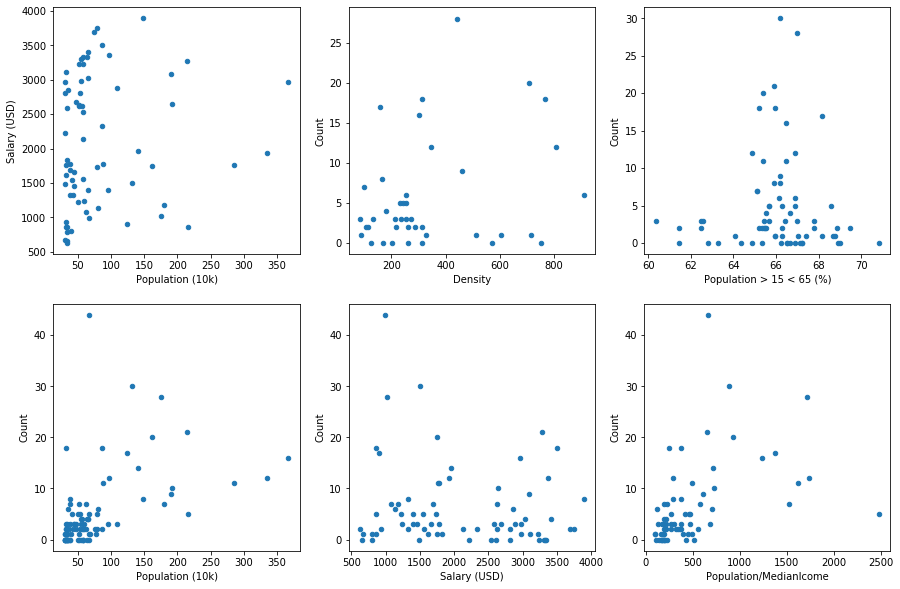

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

europe["Population/MedianIcome"] = europe["Population"]/europe["Salary (USD)"]
europe['Population (10k)'] = europe['Population']/10000 
europe['Density'] = pd.to_numeric(europe['Density'], errors='coerce')
europe['Population > 15 < 65 (%)'] = pd.to_numeric(europe['Population > 15 < 65 (%)'], errors='coerce')

fig, axes = plt.subplots(2,3, figsize=(15,10))
europe.plot(x = 'Population (10k)', y = 'Salary (USD)', kind='scatter', ax=axes[0,0])
europe.plot(x = 'Density', y = 'Count', kind='scatter', ax=axes[0,1])
europe.plot(x = 'Population > 15 < 65 (%)', y = 'Count', kind='scatter', ax=axes[0,2])

europe.plot(x = 'Population (10k)', y = 'Count', kind='scatter', ax=axes[1,0])
europe.plot(x = 'Salary (USD)', y = 'Count', kind='scatter', ax=axes[1,1])
europe.plot(x = 'Population/MedianIcome', y = 'Count', kind='scatter', ax=axes[1,2])
plt.show()

### Calculate the distance between shops within cities where multiples shops are present

Define the function that would be used.

In [48]:
from math import cos, asin, sqrt, pi

def distance(lat1, lon1, lat2, lon2):
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 12742 * asin(sqrt(a)) #2*R*asin... where R is the radius of the Earth

#### Take Berlin has an example

In [67]:
city = d_fil[d_fil['location.city']=="Berlin"]
city.reset_index(inplace=True)
city = city.drop('index',1)
Mat = np.zeros((len(city),len(city)))
Mat1 = np.zeros((len(city),len(city)))
for i in np.arange(Mat.shape[0]):
    for j in np.arange(Mat.shape[1]):
        lat1 = city['location.lat'][i]
        lng1 = city['location.lng'][i]
        lat2 = city['location.lat'][j]
        lng2 = city['location.lng'][j]
        Mat[i][j] = distance(lat1, lng1, lat2, lng2)
        if j>i: #use to make more readable matrix
            Mat1[i][j] = 0
        else:
            Mat1[i][j] = distance(lat1, lng1, lat2, lng2)

minDist = np.zeros((Mat.shape[0],1))
for i in np.arange(Mat.shape[0]):
    minDist[i] = np.min(Mat[i,:][Mat[i,:]!=0])
minDist = np.unique(minDist)*1000 # (distance(A&B) = distance(B&A) # *1000 for meters.

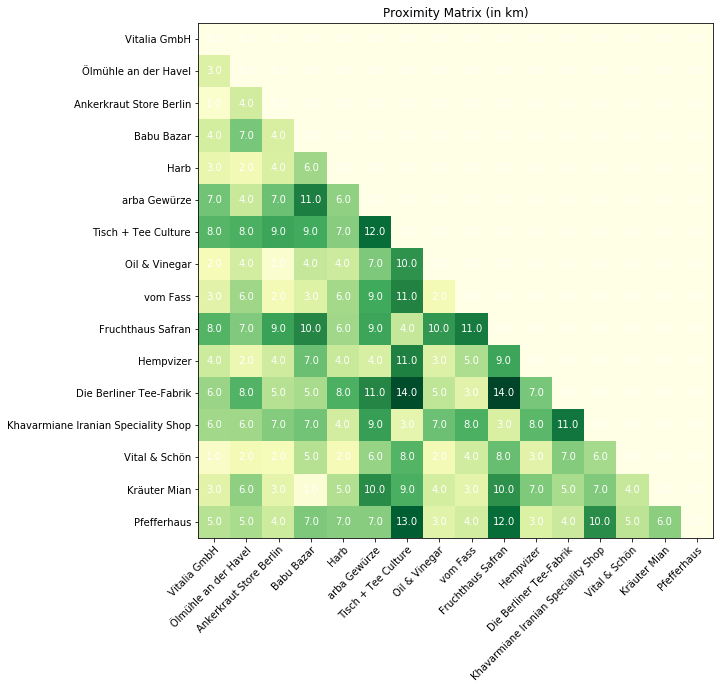

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,10))
#ax.matshow(Mat);
im = ax.imshow(Mat1, cmap="YlGn")

ax.set_xticks(np.arange(Mat.shape[0]))
ax.set_yticks(np.arange(Mat.shape[1]))
ax.set_xticklabels(city.name)
ax.set_yticklabels(city.name)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(Mat1.shape[0]):
    for j in range(Mat1.shape[1]):
        text = ax.text(j, i, np.round(Mat1[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Proximity Matrix (in km)")
fig.tight_layout()
plt.show()

### Carry the same calculation for every cities and get the array saved in the dataformat for europe with all the city
note: the cities should have more than one shop - otherwise it won't work
aggregate the data for all of the cities 

In [51]:
ListDist = []
ListExpend = []

for c in europe.City:
    #print(c)
    c = d_fil[d_fil['location.city']==c]
    if len(c)>1:
        c.reset_index(inplace=True)
        c = c.drop('index',1)
        Mat = np.zeros((len(c),len(c)))
        for i in np.arange(Mat.shape[0]):
            for j in np.arange(Mat.shape[1]):
                #if i>j: #use to make more readable matrix 
                    lat1 = c['location.lat'][i]
                    lng1 = c['location.lng'][i]
                    lat2 = c['location.lat'][j]
                    lng2 = c['location.lng'][j]
                    Mat[i][j] = distance(lat1, lng1, lat2, lng2)
        minDist = np.zeros((Mat.shape[0],1))
        for i in np.arange(Mat.shape[0]):
            #a = Mat[i,:] != 0
            minDist[i] = np.min(Mat[i,:][Mat[i,:]!=0])
    else:
        minDist = []
    ListDist.append(np.unique(minDist))
    ListExpend.extend(np.unique(minDist))
#    np.unique(minDist)*1000 # (distance(A&B) = distance(B&A)


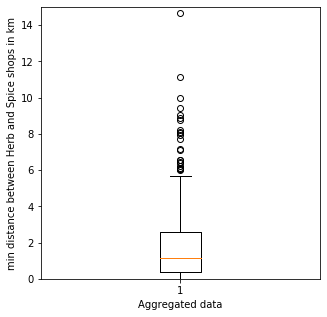

the average distance between two shops across Europe is : 2.17 km


In [52]:
%matplotlib inline

a = np.array(ListExpend)
fig, ax = plt.subplots(figsize=(5,5))
# the histogram of the data

plt.boxplot(a[(a<200) & (a!=0)])
plt.ylabel('min distance between Herb and Spice shops in km')
plt.xlabel('Aggregated data')
plt.ylim([0,15])
plt.show()

print('the average distance between two shops across Europe is :',round(np.mean(a[(a<200) & (a!=0)]),2), 'km')

### Check which type of shop are in the vicinity of the Herbs and Spice Shop

Here we will look at the 50 shops around which are in a radius of 500 m. FourSquare does not prioritize by distance to the locations, BUT ALSO include the popularity of the venues around the desired locations. As such it favour places with lot of remmendations which seems to be of a specific types - hence including a possible biais in the database and subsequent analysis. Another challenge with the way FourSquare works and return information, it is possible that an eco-system around such shop exist (Butcher, Tee shop, Cheese, Delicatessen etc), but may not have good recommendation (not popular/not well referenced) - hence would be ignore from the data.

Few solutions are possible ) which will be investigated.
 - Ignore the possible biais and use the data as is --> there are actually a relationship between restaurant and Herbs and Spice shop. OR Restaurants are located in places where it is also favourable for Herbs and Spice shop to be present (e.g. City Centre) due to the number of people circulating.
 - Remove the Restaurants from the data to keep all others. This mean that we are interested in other trends (restaurant are plentiful and located in city center and obscure any other trends that may exist.

In [54]:
# define the search query --> this got me all of the stuff with Herbs in the map
# search_query = 'Herbs & Spices Store'
# define the category ID
cat_id = '52f2ab2ebcbc57f1066b8b2c'
# define a radius of 500m
radius = 500
# only ask for a 50 requests - so I don't expect so many
LIMIT = 50
# declare an empty dataframe to append the data in the for loop
d = pd.DataFrame()

for latitude, longitude, city, country, name, category in zip(d_fil['location.lat'], 
                                                              d_fil['location.lng'],
                                                              d_fil['location.city'],
                                                              d_fil['location.country'],
                                                              d_fil['name'],
                                                              d_fil['categories']):
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        latitude, 
        longitude,
        ACCESS_TOKEN, 
        VERSION,
        radius,
        LIMIT)
    results = requests.get(url).json()
    dataframe = pd.json_normalize(results['response']['groups'][0]['items'])
    dataframe['categories'] = dataframe.apply(get_category_type, axis=1)
    # the 50 (or less) most recommended place located in 500 meters around the shop investigated.
    temp = pd.DataFrame()
    temp['categories'] = dataframe['categories']
    temp['city'] = len(dataframe)*[city]
    temp['country'] = len(dataframe)*[country]
    temp['name'] = len(dataframe)*[name]
    temp['shop cat'] = len(dataframe)*[category]    
    d = d.append(temp)
#d.shape

KeyError: 'groups'

In [55]:
results

{'meta': {'code': 403,
  'errorType': 'rate_limit_exceeded',
  'errorDetail': 'Quota exceeded',
  'requestId': '608d668e7d1aa64e2ace5369'},
 'response': {}}

## Analysis 

### Analysed with Restaurant in the dataset

Realised that few categories names exist under Restaurant so those where aggregated. 

In [57]:
d['original'] = len(d)*[1]
cat = []
for c in d['categories']:
    if c.find('Restaurant')>-1 or c.find('Steakhouse')>-1 or c.find('Burger')>-1 or  c.find('Pizza')>-1 or c.find('Sandwitch')>-1:
        cat.append('Restaurant')
    else:
        cat.append(c)
d['categories v2'] = cat
dg = d.groupby('categories v2').count()
dg.sort_values(by=['city'],ascending=False, inplace = True)
dg = dg.reset_index()
dg

KeyError: 'categories'

In [58]:
dg = d.groupby('country').count()
dg.sort_values(by=['country'],ascending=False, inplace = True)
dg = dg.reset_index()

# one hot encoding
dgg = pd.get_dummies(d['categories v2'], prefix="", prefix_sep="")
dgg['city'] = d['city']
fixed_columns = [dgg.columns[-1]] + list(dgg.columns[:-1])
dgg = dgg[fixed_columns]
#d3g = dgg.groupby('city').count()
d3g = dgg.groupby('city').mean().reset_index()
d3g.head()

KeyError: 'country'

In [ ]:
num_top_shop = 5

for c in d3g['city']:
    print("----"+c+"----")
    temp = d3g[d3g['city'] == c].T.reset_index()
    temp.columns = ['shops','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_shop))
    print('\n')

As we can see, in most cities, Restaurants are by far the most frequent type of establishement around the location. This is most likely because :
1. there are lot of resturants (compared to Herbs and Spice shops)
2. Herbs and Spice shops are located where there are a lot of foot traffic, such as city centre - This was already showed before.

### Analysis after removing the restaurants to establish if an underlying eco-system exist

In [ ]:
a = d['categories v2'] != 'Restaurant'
#d.iloc[a.index.values,:].head(20)
nores = d[a]

# one hot encoding
dgg = pd.get_dummies(nores['categories v2'], prefix="", prefix_sep="")
dgg['country'] = nores['country']
fixed_columns = [dgg.columns[-1]] + list(dgg.columns[:-1])
dgg = dgg[fixed_columns]
#d3g = dgg.groupby('city').count()
d3g = dgg.groupby('country').mean().reset_index()
d3g.head()

In [ ]:
num_top_shop = 5

for c in d3g['country']:
    print("----"+c+"----")
    temp = d3g[d3g['country'] == c].T.reset_index()
    temp.columns = ['shops','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_shop))
    print('\n')

Now that we have removed the restaurants.
Lets have a look at which categories are the most often found in the first 10 of each country

In [ ]:
shops = []
num_top_shop = 10

for c in d3g['country']:
    temp = d3g[d3g['country'] == c].T.reset_index()
    temp.columns = ['shops','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    a = temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_shop)
    shops.extend(a['shops'].values)

freq = np.zeros(len(np.unique(shops)))

for c,u in enumerate(np.unique(shops)):
    freq[c] = sum([1 for s in shops if s==u])    

print('Here are the shops which are the most often around the Herbs and Spice shops: \n',
      np.array(np.unique(shops))[np.argsort(-freq)][0:10])

From these data, no singular trend emerge. 
Although, Coffee Shop, Café, Bar, Bakery, Clothing Store tends to be location that attract peoples and can usually be access by foot. It is therefore expected that a location with significant foot traffic is key. Hence the location should not be limited to being in the centre but in commercial area, populated with other types of shop.


# Results

## Herbs and Spice vs Population Statistic in European Cities

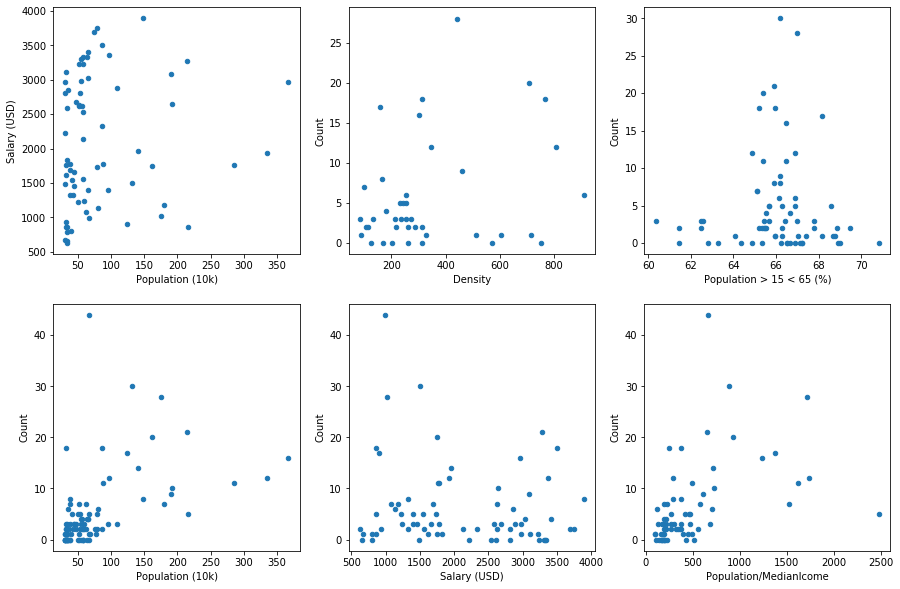

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

europe["Population/MedianIcome"] = europe["Population"]/europe["Salary (USD)"]
europe['Population (10k)'] = europe['Population']/10000 
europe['Density'] = pd.to_numeric(europe['Density'], errors='coerce')
europe['Population > 15 < 65 (%)'] = pd.to_numeric(europe['Population > 15 < 65 (%)'], errors='coerce')

fig, axes = plt.subplots(2,3, figsize=(15,10))
europe.plot(x = 'Population (10k)', y = 'Salary (USD)', kind='scatter', ax=axes[0,0])
europe.plot(x = 'Density', y = 'Count', kind='scatter', ax=axes[0,1])
europe.plot(x = 'Population > 15 < 65 (%)', y = 'Count', kind='scatter', ax=axes[0,2])

europe.plot(x = 'Population (10k)', y = 'Count', kind='scatter', ax=axes[1,0])
europe.plot(x = 'Salary (USD)', y = 'Count', kind='scatter', ax=axes[1,1])
europe.plot(x = 'Population/MedianIcome', y = 'Count', kind='scatter', ax=axes[1,2])
plt.show()

1. The data clearly shows that Herbs and Spice shops increase with the population of the cities. But a lot of disparity, which may be linked with the local/cultural variations. It could be that because fewer larger cities are present, the linear regraession would be weak.
2. Salary or MedianIcome seem to have a lot influence of the number of shops. Although it is expected to have an influence on the price of goods.
3. Density of population also does not seems to have an influence
4. The demographic (age of the population) does not seems to have an influence either.

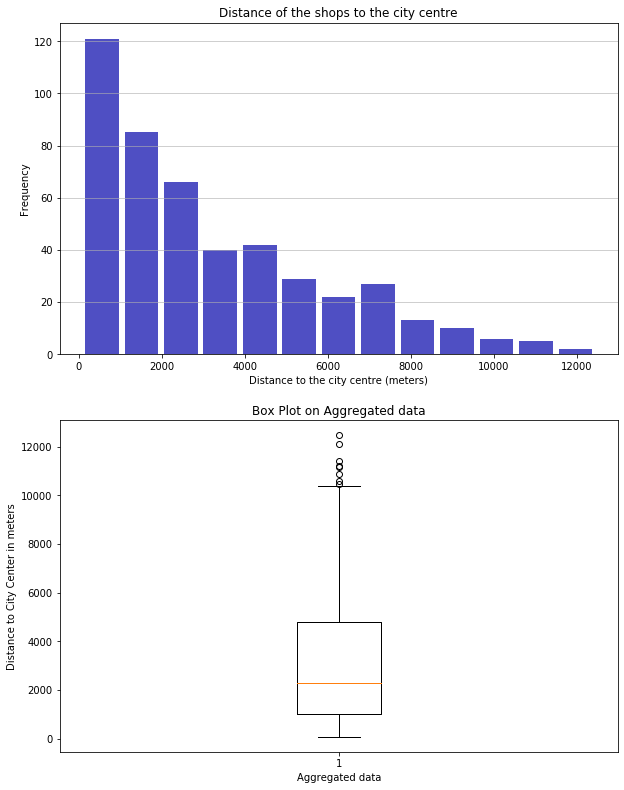

In [60]:
fig = plt.figure(figsize=(10,15))
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(2,1,1)
n, bins, patches = ax1.hist(x=d_fil['location.distance'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
ax1.grid(axis='y', alpha=0.75)
ax1.set_xlabel('Distance to the city centre (meters)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distance of the shops to the city centre')

ax2 = fig.add_subplot(212)
ax2.set_title('Box Plot on Aggregated data')
ax2.boxplot(d_fil['location.distance'])
ax2.set_xlabel('Aggregated data')
ax2.set_ylabel('Distance to City Center in meters')
plt.show()

Most of the Herbs and Spice Shops are located in the center within 2 km. Although they extend out relatively far, which suggest that they can also be found other population centers which are not the city centre. Most likely smaller cities or neihbourghood which have be absorded by the large city.

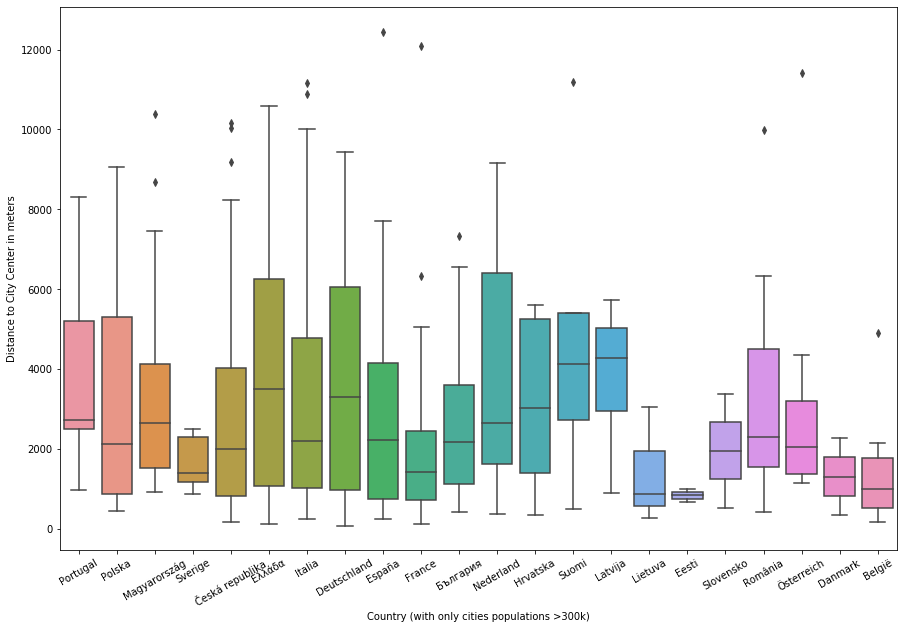

In [61]:
fig1, ax1 = plt.subplots(figsize=(15,10))
ax = sns.boxplot(x="location.country", y="location.distance", data=d_fil)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_ylabel('Distance to City Center in meters')
ax1.set_xlabel('Country (with only cities populations >300k)')
plt.show()

This figure show the distribution of shops in specific country for cities which have a population greated than 300 000 inhabitants. There are lot of variations across country, and not two country are the same. Although the trend mentionned above still stand. This point towards the fact that some other influence are at play.

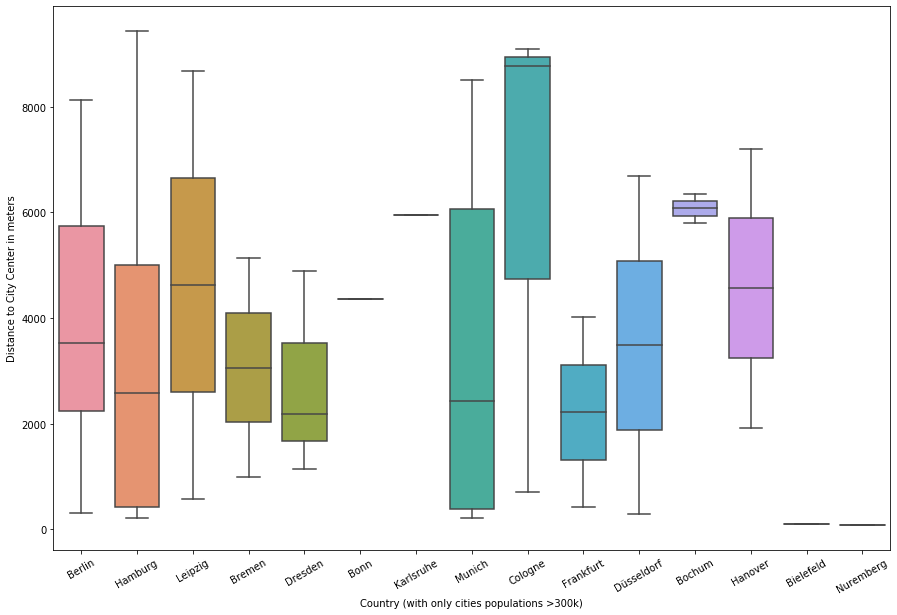

In [62]:
d_fil2 = d_fil[d_fil['location.country']=='Deutschland']
fig1, ax1 = plt.subplots(figsize=(15,10))
ax = sns.boxplot(x="location.city", y="location.distance", data=d_fil2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_ylabel('Distance to City Center in meters')
ax1.set_xlabel('Country (with only cities populations >300k)')
plt.show()

Again by looking in a specific country (here Germany), no real trends emerge.

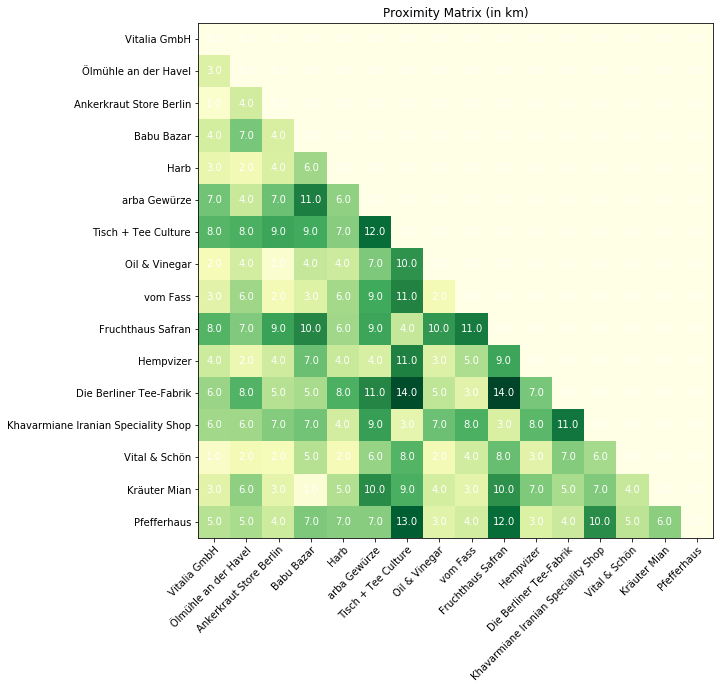

In [68]:
city = d_fil[d_fil['location.city']=="Berlin"]
fig, ax = plt.subplots(figsize=(10,10))
#ax.matshow(Mat);
im = ax.imshow(Mat1, cmap="YlGn")

ax.set_xticks(np.arange(Mat.shape[0]))
ax.set_yticks(np.arange(Mat.shape[1]))
ax.set_xticklabels(city.name)
ax.set_yticklabels(city.name)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(Mat1.shape[0]):
    for j in range(Mat1.shape[1]):
        text = ax.text(j, i, np.round(Mat1[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Proximity Matrix (in km)")
fig.tight_layout()
plt.show()

In Berlin - which has a lot of Spice Shops, they are located about 2km away from each other at minimum and relatively well distributed through the city.

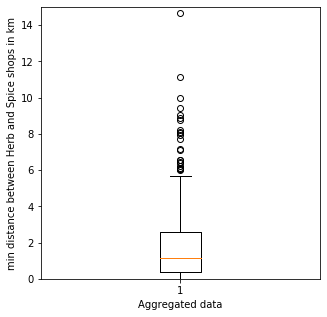

the average distance between two shops across Europe is : 2.17 km


In [64]:
a = np.array(ListExpend)
fig, ax = plt.subplots(figsize=(5,5))
# the histogram of the data

plt.boxplot(a[(a<200) & (a!=0)])
plt.ylabel('min distance between Herb and Spice shops in km')
plt.xlabel('Aggregated data')
plt.ylim([0,15])
plt.show()

print('the average distance between two shops across Europe is :',round(np.mean(a[(a<200) & (a!=0)]),2), 'km')

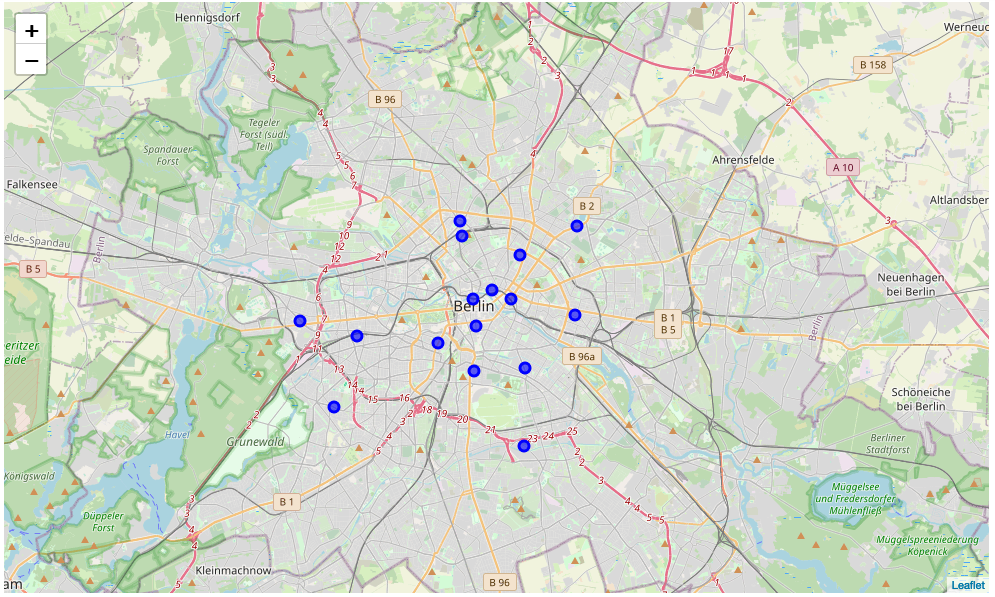

In [65]:
from IPython.display import Image
Image(filename='/Users/oliviermesse/Desktop/Berlin Distribution.png') 

# Discussion

The results were presented in the previous section. 
From those, we can state that the number of Herbs and Spice Shops are linked to the population, although no strong correlation where showed. These shops tends to be located in the city centre where lot of foot traffic is present, illustrated by the presence of  restaurants, coffee shops, café.

Shops are on average 2km away from each other are distributed throughout a city. 

In this analysis, we did not account solely of Herbs and Spice but also other shops that may sold Herbs and Spice products to provide a larger pictures, and doing so may introduce a biais in our results.

We limited our analysis on large cities as the data where more easily mined, but may provide additional insight. In this case, the analysis should be limited to a specific country or regions as we except regional/cultural effect, as demonstrated in the results

# Conclusions

An evaluation of the distribution of Herbs and Spice Shops across Europe in cities where the population exceed 300 000 inhabitants is presented.

The number of shops scales with the number of population, although the relation is not absolutely linear. Other data associated with those city (population density, population demographic, meadian income, salary) have been tested, although they do not seems to be variables that influence the number of Herbs and Spice Shop in a cities.

These shops are predominantly located in city centre, although they can be  found in the cities outshirts (within 12 km radius from the city centre). They are located in area with foot traffic, demonstrated by the type of shops in their vicinities.

Aside from those general trends. No national trends emerged on their location based on the city or country.
This suggest that it may be best to look a given area, city and carry a deeper evaluation rather than relying on general (european) overall.

the analysis was carried solely on large cities, smaller cities were completely ignored in this analysis, but maybe interesting to look at as well, although carrying such analysis was not possible due to the limitation of the free access on the FourSquare.
